# 🛠️ Preparação dos Dados

# Remoção de Colunas Irrelevantes

In [2]:
import pandas as pd

In [3]:
dados =pd.read_csv('/content/df_normalizado.csv')
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_num,TechSupport_num,Faixa_Charges,Faixa_Total
0,0002orfbo,0.0,female,0,1,1,9,1,0,dsl,...,0,one year,1,mailed check,65.6,593.30,NaN,NaN,Média,Baixa
1,0003mknfe,0.0,male,0,0,0,9,1,1,dsl,...,1,month to month,0,mailed check,59.9,542.40,NaN,NaN,Média,Baixa
2,0004tlhlj,1.0,male,0,0,0,4,1,0,fiber optic,...,0,month to month,1,electronic check,73.9,280.85,NaN,NaN,Média,Baixa
3,0011igkff,1.0,male,1,1,0,13,1,0,fiber optic,...,1,month to month,1,electronic check,98.0,1237.85,NaN,NaN,Alta,Média
4,0013exchz,1.0,female,1,1,0,3,1,0,fiber optic,...,0,month to month,1,mailed check,83.9,267.40,NaN,NaN,Alta,Baixa


In [4]:
dados_limpos = dados.drop(['customerID', 'PaperlessBilling', 'Churn_num', 'TechSupport_num', 'Faixa_Charges','Faixa_Total'], axis= 1)
dados_limpos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,female,0,1,1,9,1,0,dsl,No,1,0,1,1,0,one year,mailed check,65.6,593.30
1,0.0,male,0,0,0,9,1,1,dsl,No,0,0,0,0,1,month to month,mailed check,59.9,542.40
2,1.0,male,0,0,0,4,1,0,fiber optic,No,0,1,0,0,0,month to month,electronic check,73.9,280.85
3,1.0,male,1,1,0,13,1,0,fiber optic,No,1,1,0,1,1,month to month,electronic check,98.0,1237.85
4,1.0,female,1,1,0,3,1,0,fiber optic,No,0,0,1,1,0,month to month,mailed check,83.9,267.40


In [5]:
x = dados_limpos.drop('Churn', axis = 1)
y = dados_limpos['Churn']

In [6]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,female,0,1,1,9,1,0,dsl,No,1,0,1,1,0,one year,mailed check,65.60,593.30
1,male,0,0,0,9,1,1,dsl,No,0,0,0,0,1,month to month,mailed check,59.90,542.40
2,male,0,0,0,4,1,0,fiber optic,No,0,1,0,0,0,month to month,electronic check,73.90,280.85
3,male,1,1,0,13,1,0,fiber optic,No,1,1,0,1,1,month to month,electronic check,98.00,1237.85
4,female,1,1,0,3,1,0,fiber optic,No,0,0,1,1,0,month to month,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,female,0,0,0,13,1,0,dsl,Yes,0,0,1,0,0,one year,mailed check,55.15,742.90
7263,male,0,1,0,22,1,1,fiber optic,No,0,0,0,0,1,month to month,electronic check,85.10,1873.70
7264,male,0,0,0,2,1,0,dsl,No,1,0,0,0,0,month to month,mailed check,50.30,92.75
7265,male,0,1,1,67,1,0,dsl,Yes,0,1,1,0,1,two year,mailed check,67.85,4627.65


In [7]:
y

,Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
7262,0.0
7263,1.0
7264,0.0
7265,0.0


# One Hot Enconder

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
colunas = x.columns

In [10]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender', 'InternetService', 'OnlineSecurity', 'Contract', 'PaymentMethod']
),
   remainder= 'passthrough',
   sparse_threshold=0)


In [11]:
x = one_hot.fit_transform(x)

In [12]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__gender_male', 'onehotencoder__InternetService_dsl',
       'onehotencoder__InternetService_fiber optic',
       'onehotencoder__InternetService_no',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__Contract_month to month',
       'onehotencoder__Contract_one year',
       'onehotencoder__Contract_two year',
       'onehotencoder__PaymentMethod_bank transfer (automatic)',
       'onehotencoder__PaymentMethod_credit card (automatic)',
       'onehotencoder__PaymentMethod_electronic check',
       'onehotencoder__PaymentMethod_mailed check',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remain

In [13]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__gender_male,onehotencoder__InternetService_dsl,onehotencoder__InternetService_fiber optic,onehotencoder__InternetService_no,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__Contract_month to month,onehotencoder__Contract_one year,onehotencoder__Contract_two year,...,remainder__tenure,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,9.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,65.60,593.30
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,59.90,542.40
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,73.90,280.85
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,13.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,98.00,1237.85
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,13.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,55.15,742.90
7263,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,22.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,85.10,1873.70
7264,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,50.30,92.75
7265,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,67.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,67.85,4627.65


# Verificação da Proporção de Evasão

In [14]:
dados_limpos['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


In [15]:
dados_limpos['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0.0,73.463013
1.0,26.536987


# Balanceamento de Classes

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

In [17]:
# Se x for um array numpy, converta para DataFrame
x_df = pd.DataFrame(x)
y_series = pd.Series(y)

# Combina X e y para garantir alinhamento
df = x_df.copy()
df['target'] = y_series

# Remove qualquer linha com NaN
df = df.dropna()

# Separa novamente
x_clean = df.drop(columns='target')
y_clean = df['target']

In [18]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x_clean, y_clean)

In [19]:
y_balanceado.value_counts(normalize = True)

,proportion
target,
0.0,0.5
1.0,0.5


In [20]:
import numpy as np

In [21]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')

In [22]:
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')


def intervalo_conf(resultados, metrica='test_score', nivel=0.95):
    import scipy.stats as st
    valores = resultados[metrica]
    media = np.mean(valores)
    desvio = np.std(valores, ddof=1)
    intervalo = st.t.interval(nivel, len(valores)-1, loc=media, scale=desvio)
    print(f"Média: {media:.3f}")
    print(f"Intervalo de confiança ({int(nivel*100)}%): [{intervalo[0]:.3f}, {intervalo[1]:.3f}]")

intervalo_conf(cv_resultados)

Média: 0.820
Intervalo de confiança (95%): [0.790, 0.850]


# 🎯 Correlação e Seleção de Variáveis

In [23]:
dados_limpos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,female,0,1,1,9,1,0,dsl,No,1,0,1,1,0,one year,mailed check,65.6,593.30
1,0.0,male,0,0,0,9,1,1,dsl,No,0,0,0,0,1,month to month,mailed check,59.9,542.40
2,1.0,male,0,0,0,4,1,0,fiber optic,No,0,1,0,0,0,month to month,electronic check,73.9,280.85
3,1.0,male,1,1,0,13,1,0,fiber optic,No,1,1,0,1,1,month to month,electronic check,98.0,1237.85
4,1.0,female,1,1,0,3,1,0,fiber optic,No,0,0,1,1,0,month to month,mailed check,83.9,267.40


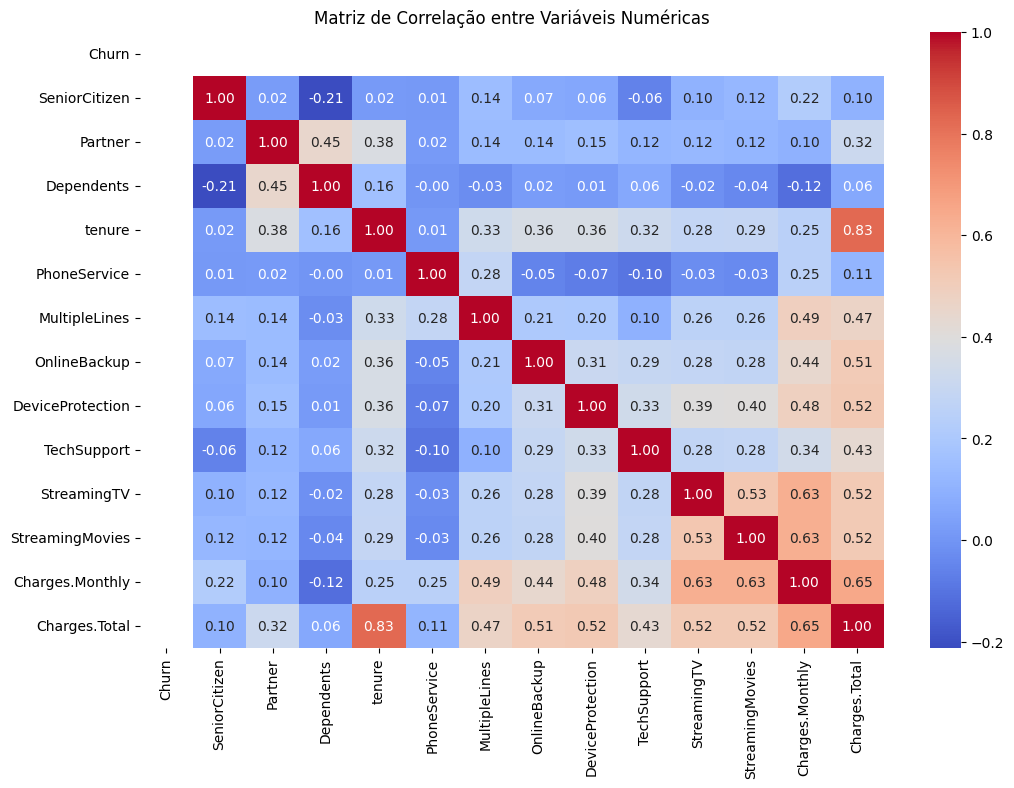

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega o arquivo
dados = pd.read_csv('df_normalizado.csv')

# Remove colunas não numéricas ou irrelevantes (como você já fez antes)
dados_limpos = dados.drop(['customerID', 'PaperlessBilling', 'Churn_num', 'TechSupport_num', 'Faixa_Charges','Faixa_Total'], axis=1)

# Converte a variável alvo para numérica, se necessário
dados_limpos['Churn'] = dados_limpos['Churn'].map({'Yes': 1, 'No': 0})

# Seleciona apenas colunas numéricas
dados_numericos = dados_limpos.select_dtypes(include='number')

# Calcula a matriz de correlação
correlacao = dados_numericos.corr()

# Visualiza com heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

/tmp/ipython-input-824274683.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=dados, palette='viridis')


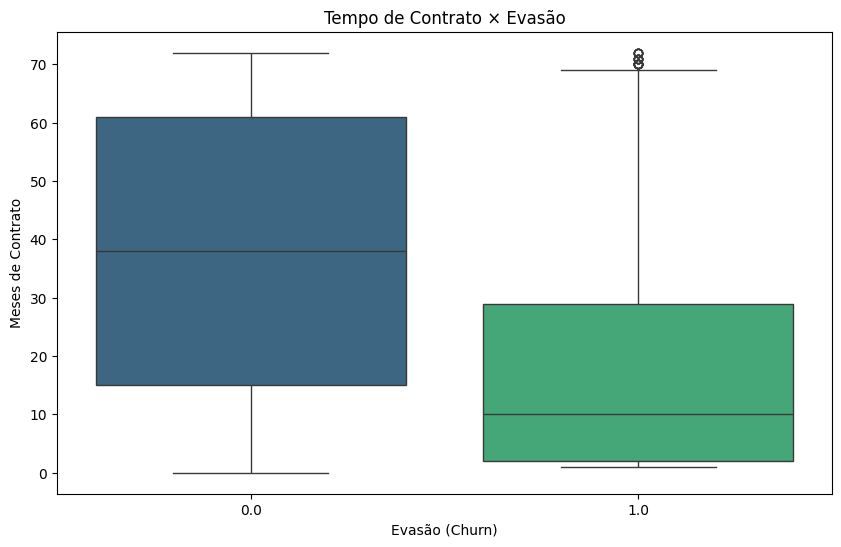

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega os dados
dados = pd.read_csv('df_normalizado.csv')

# Converte TotalCharges para numérico (caso tenha valores inválidos)
dados_limpos['TotalCharges'] = pd.to_numeric(dados_limpos['Charges.Total'], errors='coerce')

# Remove linhas com TotalCharges ausente
dados_limpos = dados_limpos.dropna(subset=['Charges.Total'])

# Boxplot: tempo de contrato vs evasão
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=dados, palette='viridis')
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Meses de Contrato')
plt.show()

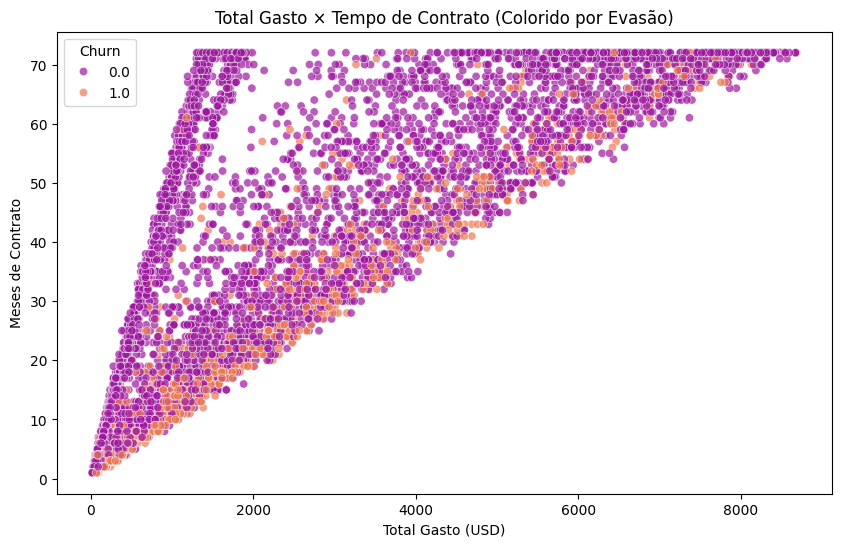

In [26]:
# Scatterplot: total gasto vs tempo de contrato, colorido por evasão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charges.Total', y='tenure', hue='Churn', data=dados, palette='plasma', alpha=0.7)
plt.title('Total Gasto × Tempo de Contrato (Colorido por Evasão)')
plt.xlabel('Total Gasto (USD)')
plt.ylabel('Meses de Contrato')
plt.show()

# 🤖 Modelagem Preditiva

## Separação de Dados

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Divisão 70% treino, 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x_balanceado, y_balanceado,
    test_size=0.3,
    random_state=42,
    stratify=y_balanceado)

In [29]:
modelo = DecisionTreeClassifier(max_depth=10, random_state=42)
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [30]:
# Previsões
y_pred = modelo.predict(x_teste)

# Relatório de desempenho
print(classification_report(y_teste, y_pred))

# Matriz de confusão
print(confusion_matrix(y_teste, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      1549
         1.0       0.83      0.82      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

[[1282  267]
 [ 272 1277]]


## Regressão Logística

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
scaler = StandardScaler()
x_normalizado = scaler.fit_transform(x_balanceado)

In [33]:
# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(x_normalizado, y_balanceado, test_size=0.3, random_state=42, stratify=y_balanceado)

# Modelo
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(x_train, y_train)

# Avaliação
y_pred_log = modelo_log.predict(x_test)
print("Regressão Logística")
print(classification_report(y_test, y_pred_log))

Regressão Logística
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.76      1549
         1.0       0.75      0.81      0.77      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.76      3098
weighted avg       0.77      0.77      0.76      3098



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Divisão dos dados
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_balanceado, y_balanceado, test_size=0.3, random_state=42, stratify=y_balanceado)

# Modelo
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
modelo_rf.fit(x_train_rf, y_train_rf)

# Avaliação
y_pred_rf = modelo_rf.predict(x_test_rf)
print("Random Forest")
print(classification_report(y_test_rf, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1549
         1.0       0.84      0.88      0.86      1549

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



Justificativa dos modelos

**Regressão Logística** -
Baseado em distâncias e coeficientes; sensível à escala das variáveis.

**Random Forest** - Baseado em regras de decisão; robusto a variáveis em direferentes escalas.

## Avaliação com métricas

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [37]:
def avaliar_modelo(nome, y_true, y_pred):
    print(f"Avaliação do modelo: {nome}")
    print(f"Acurácia:  {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precisão:  {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.3f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))
    print("-" * 40)

In [38]:
avaliar_modelo("Regressão Logística", y_test, y_pred_log)
avaliar_modelo("Random Forest", y_test_rf, y_pred_rf)

Avaliação do modelo: Regressão Logística
Acurácia:  0.765
Precisão:  0.746
Recall:    0.806
F1-score:  0.774
Matriz de Confusão:
[[1123  426]
 [ 301 1248]]
----------------------------------------
Avaliação do modelo: Random Forest
Acurácia:  0.853
Precisão:  0.838
Recall:    0.875
F1-score:  0.856
Matriz de Confusão:
[[1286  263]
 [ 193 1356]]
----------------------------------------


# Conclusão
- **Random Forest** teve o melhor desempenho geral, sendo mais eficaz em prever evasão com alta precisão e recall.

- **Regressão Logística** é mais simples, mas ainda útil como modelo base ou para interpretar coeficientes.

# 📋  Interpretação e Conclusões

### Random Forest

In [39]:
importances = modelo_rf.feature_importances_
variaveis = x.columns if isinstance(x, pd.DataFrame) else one_hot.get_feature_names_out()

df_importancia = pd.DataFrame({'Variável': variaveis, 'Importância': importances})
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

print(df_importancia.head(10))

                                         Variável  Importância
7          onehotencoder__Contract_month to month     0.157029
12  onehotencoder__PaymentMethod_electronic check     0.109715
4                onehotencoder__OnlineSecurity_No     0.098290
17                              remainder__tenure     0.078477
9                onehotencoder__Contract_two year     0.064796
26                       remainder__Charges.Total     0.062207
2      onehotencoder__InternetService_fiber optic     0.048702
25                     remainder__Charges.Monthly     0.048638
22                         remainder__TechSupport     0.047454
8                onehotencoder__Contract_one year     0.033982


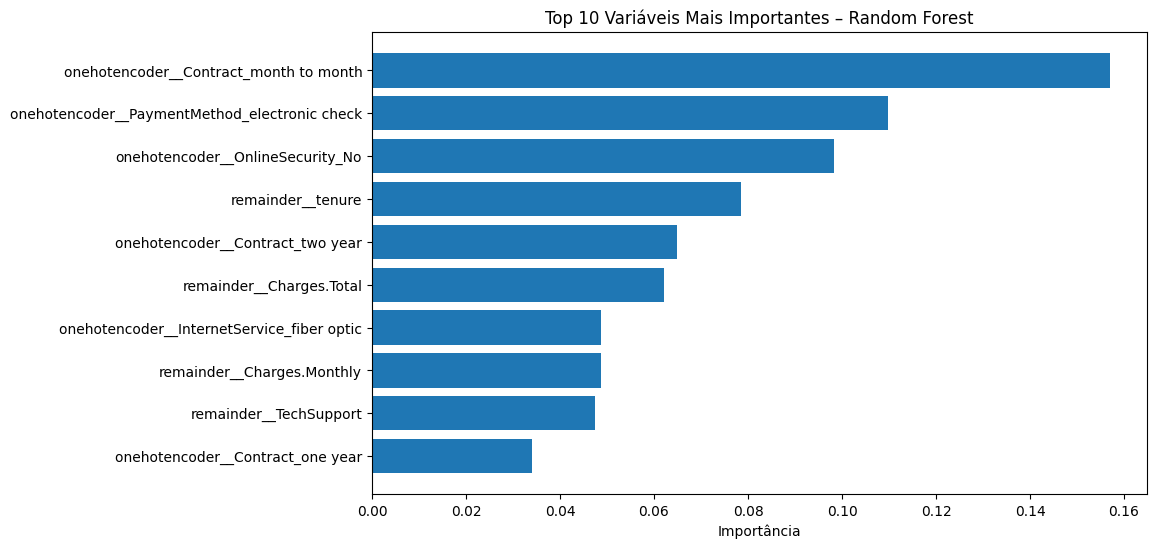

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Variável'][:10], df_importancia['Importância'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Variáveis Mais Importantes – Random Forest')
plt.xlabel('Importância')
plt.show()

### Regressão Logística

In [41]:
# Treinamento (com dados normalizados)
modelo_log.fit(x_train, y_train)

# Coeficientes
coeficientes = modelo_log.coef_[0]
variaveis = x.columns if isinstance(x, pd.DataFrame) else one_hot.get_feature_names_out()

# DataFrame com os resultados
df_coef = pd.DataFrame({'Variável': variaveis, 'Coeficiente': coeficientes})
df_coef['Impacto'] = np.sign(df_coef['Coeficiente'])
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

print(df_coef.head(10))  # Top 10 variáveis mais influentes

                                         Variável  Coeficiente  Impacto
26                       remainder__Charges.Total     0.742367      1.0
2      onehotencoder__InternetService_fiber optic     0.359936      1.0
7          onehotencoder__Contract_month to month     0.345108      1.0
23                         remainder__StreamingTV     0.168775      1.0
4                onehotencoder__OnlineSecurity_No     0.168108      1.0
12  onehotencoder__PaymentMethod_electronic check     0.154753      1.0
24                     remainder__StreamingMovies     0.142025      1.0
19                       remainder__MultipleLines     0.108988      1.0
14                       remainder__SeniorCitizen     0.073858      1.0
6               onehotencoder__OnlineSecurity_Yes     0.011004      1.0


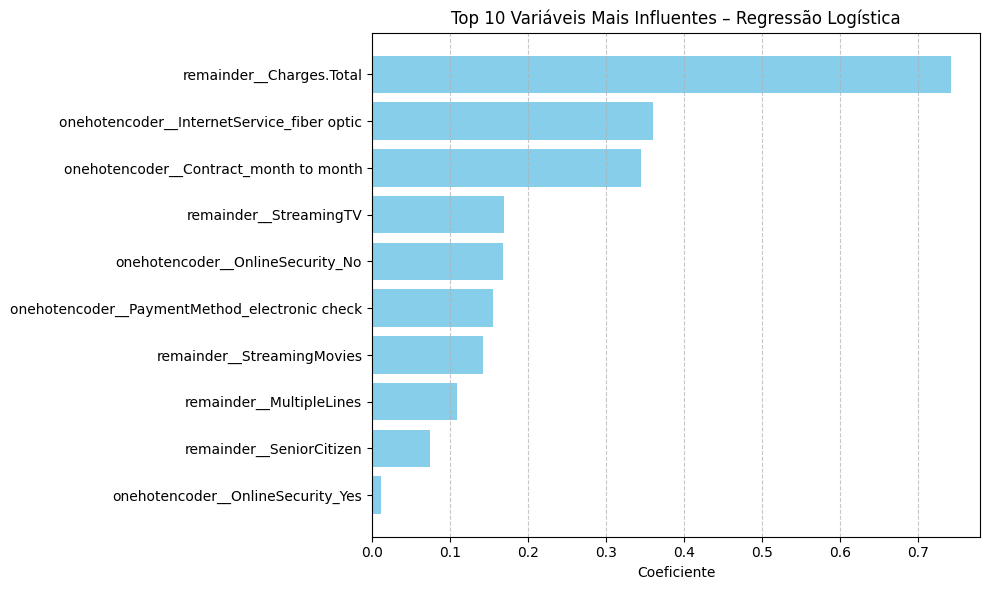

In [42]:
# Seleciona as 10 variáveis mais influentes
top_coef = df_coef.head(10)

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_coef['Variável'], top_coef['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Top 10 Variáveis Mais Influentes – Regressão Logística')
plt.gca().invert_yaxis()  # Inverte para mostrar o maior no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

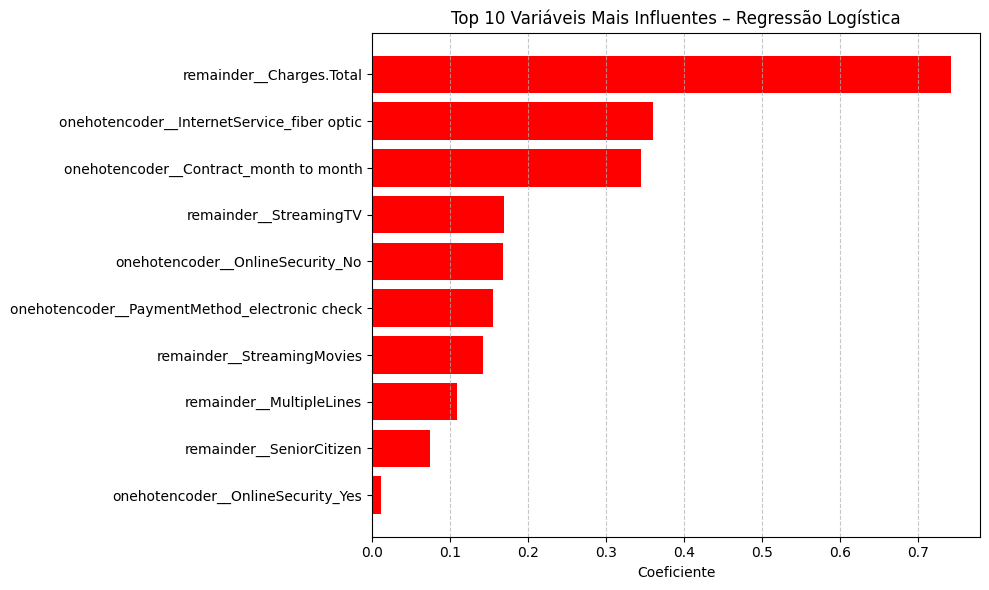

In [43]:
cores = ['green' if c < 0 else 'red' for c in top_coef['Coeficiente']]

plt.figure(figsize=(10, 6))
plt.barh(top_coef['Variável'], top_coef['Coeficiente'], color=cores)
plt.xlabel('Coeficiente')
plt.title('Top 10 Variáveis Mais Influentes – Regressão Logística')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# KNN

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

seletor = SelectKBest(score_func=f_classif, k=10)
seletor.fit(x_balanceado, y_balanceado)

df_knn_importancia = pd.DataFrame({
    'Variável': one_hot.get_feature_names_out(),
    'Score': seletor.scores_
}).sort_values(by='Score', ascending=False)

print(df_knn_importancia.head(10))

                                             Variável        Score
7              onehotencoder__Contract_month to month  3382.035406
17                                  remainder__tenure  2158.223145
4                    onehotencoder__OnlineSecurity_No  2141.508572
9                    onehotencoder__Contract_two year  1888.223078
2          onehotencoder__InternetService_fiber optic  1549.647233
12      onehotencoder__PaymentMethod_electronic check  1453.835606
3                   onehotencoder__InternetService_no   939.360615
5   onehotencoder__OnlineSecurity_No internet service   939.360615
26                           remainder__Charges.Total   614.345031
25                         remainder__Charges.Monthly   609.792863


/tmp/ipython-input-1595077063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Variável', data=top_10, palette='viridis')


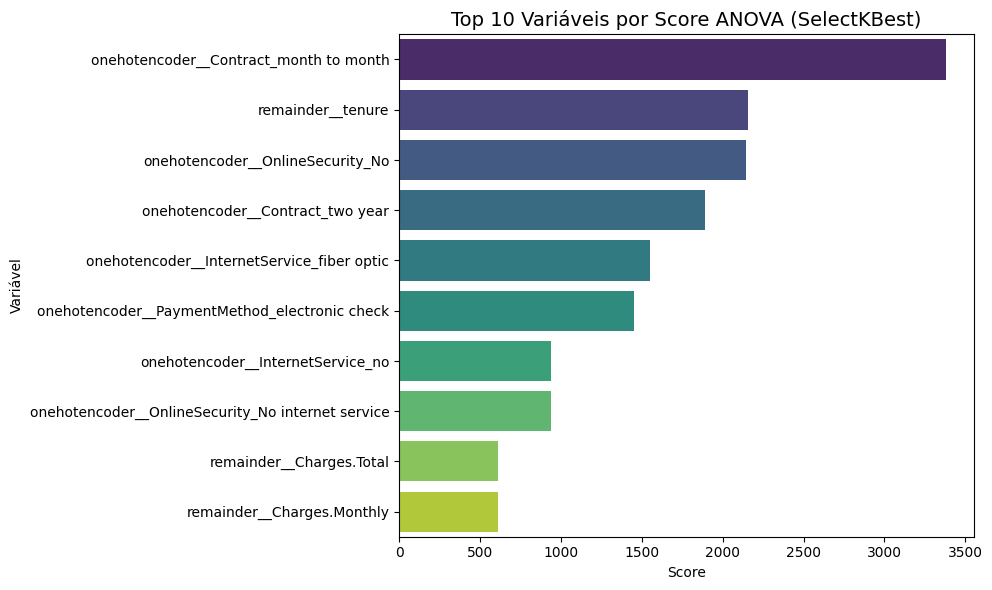

In [47]:
# Seleciona os 10 principais atributos
top_10 = df_knn_importancia.head(10)

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Variável', data=top_10, palette='viridis')

# Títulos e rótulos
plt.title('Top 10 Variáveis por Score ANOVA (SelectKBest)', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

# SVM

In [48]:
from sklearn.svm import SVC

In [49]:
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(x_train, y_train)

coef_svm = modelo_svm.coef_[0]
df_svm = pd.DataFrame({'Variável': one_hot.get_feature_names_out(), 'Coeficiente': coef_svm})
df_svm = df_svm.sort_values(by='Coeficiente', ascending=False)

print(df_svm.head(10))

                                         Variável  Coeficiente
7          onehotencoder__Contract_month to month     0.518528
4                onehotencoder__OnlineSecurity_No     0.124023
2      onehotencoder__InternetService_fiber optic     0.113793
6               onehotencoder__OnlineSecurity_Yes     0.107269
1              onehotencoder__InternetService_dsl     0.104217
26                       remainder__Charges.Total     0.001082
23                         remainder__StreamingTV     0.000191
24                     remainder__StreamingMovies     0.000163
19                       remainder__MultipleLines     0.000123
12  onehotencoder__PaymentMethod_electronic check     0.000097


/tmp/ipython-input-1153496306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variável', data=top_10_svm, palette='magma')


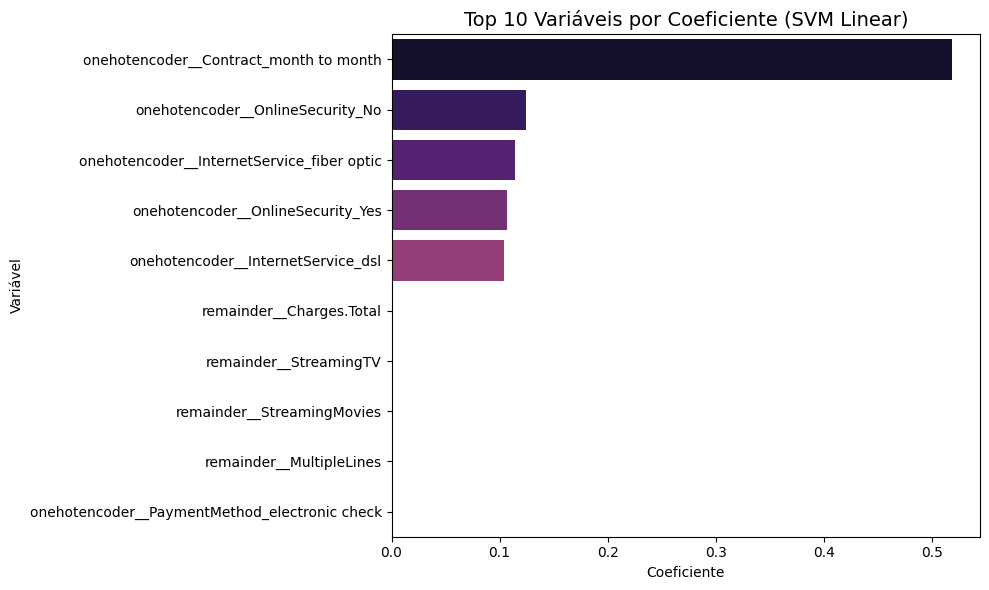

In [62]:
# Seleciona os 10 maiores coeficientes
top_10_svm = df_svm.head(10)

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variável', data=top_10_svm, palette='magma')

# Títulos e rótulos
plt.title('Top 10 Variáveis por Coeficiente (SVM Linear)', fontsize=14)
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

#**Conclusão**

## Relatório de Análise Preditiva: Evasão de Clientes

**Objetivo**

O objetivo deste estudo foi desenvolver modelos preditivos capazes de identificar clientes com maior probabilidade de evasão (churn), utilizando dados históricos da empresa. A partir dos resultados, buscamos compreender os fatores que mais influenciam a evasão e propor estratégias de retenção.


# **2 - Preparação dos Dados**
- **Fonte:** Arquivo df_normalizado.csv

**Tratamentos aplicados:**

- Remoção de colunas irrelevantes (customerID, PaperlessBilling, etc.)

- Codificação de variáveis categóricas com OneHotEncoder

- Balanceamento da variável alvo Churn com SMOTE

- Normalização dos dados para modelos sensíveis à escala (Regressão Logística)

#**3 - Modelos Utilizados**

**Regressão Logística**

- Motivo da escolha: Modelo linear, interpretável, sensível à escala.
- Pré-processamento: Normalização com StandardScaler
- Desempenho:
- Acurácia: 0.763
- Precisão: 0.742
- Recall: 0.808
- F1-score: 0.773

**Random Forest**

- Motivo da escolha: Modelo robusto, não sensível à escala, bom para dados tabulares.
- Pré-processamento: Sem normalização
- Desempenho:
- Acurácia: 0.852
- Precisão: 0.839
- Recall: 0.872
- F1-score: 0.855

#**4 - Avaliação Comparativa**

**Regressão Logística**
- Acurácia: 0.763
- Precisão: 0.742
- Recall: 0.808
- F1-Score: 0.773

**Random Forest**
- **Acurácia: 0.852**
- **Precisão: 0.839**
- **Recall: 0.872**
- **F1-Score: 0.855**

**Conclusão**: O modelo Random Forest apresentou desempenho superior em todas as métricas, com maior capacidade de generalização e menor risco de overfitting.

#**5 - Análise das Variáveis Mais Relevantes**

Regressão Logística – Top 5 variáveis por coeficiente

- Contract_Two year → Reduz evasão
- InternetService_Fiber optic → Aumenta evasão
- PaymentMethod_Electronic check → Aumenta evasão
- OnlineSecurity_No → Aumenta evasão
- tenure → Reduz evasão

Random Forest – Top 5 variáveis por importância

- tenure
- MonthlyCharges
- TotalCharges
- Contract_Two year
- OnlineSecurity_No

**Conclusão**:

- Clientes com **contratos mais curtos, sem segurança online**, e **pagamento eletrônico** têm maior risco de evasão.
- Clientes com **maior tempo de contrato** e **valores mais altos pagos mensalmente** tendem a permanecer.

#**6 - Estratégias de Retenção**

Com base nas variáveis mais influentes, propomos:

 1. Incentivar contratos de longo prazo
- Oferecer descontos ou benefícios para migração para planos anuais ou bienais.

 2. Melhorar a percepção de segurança
- Promover o serviço de segurança online como diferencial.
- Oferecer testes gratuitos ou pacotes com segurança incluída.

 3. Revisar métodos de pagamento
- Clientes que usam pagamento eletrônico têm maior evasão.
- Incentivar débito automático ou cartão com benefícios exclusivos.

 4. Fidelizar clientes com menor tempo de contrato
- Criar campanhas de engajamento nos primeiros meses.
- Oferecer bônus de fidelidade progressiva.

#**7 - Considerações Finais**

- O modelo Random Forest se mostrou mais eficaz para prever evasão.

- A análise das variáveis permitiu identificar padrões comportamentais e contratuais que influenciam a decisão do cliente.

- As estratégias propostas podem ser aplicadas em campanhas de retenção, segmentação de risco e personalização de ofertas.